In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def calcSampledCurve(resultdf, valColName, tickNumBins, valNumBins):
    maxTick = resultdf.ticks.max()
    maxValue = resultdf[valColName].max()
    resultdf['tickfrac'] = resultdf.ticks.apply(lambda x: x/maxTick)
    resultdf['valfrac'] = resultdf[valColName].apply(lambda x: x/maxValue)
    #print(resultdf)
    resultdf['tickbin'] = pd.cut(resultdf.tickfrac,bins=np.linspace(0, 1, 1 + tickNumBins))
    resultdf['valbin'] = pd.cut(resultdf.valfrac,bins=np.linspace(0, 1, 1 + valNumBins))
    #print(resultdf.tickbin.cat.categories)
    #print(resultdf.valbin.cat.categories)
    #print(resultdf)
    sampled_df = resultdf[['tickbin','valbin']]
    sampled_df = sampled_df.drop_duplicates()
    sampled_df['tickbinNo'] = sampled_df.tickbin.cat.codes / (tickNumBins - 1)
    sampled_df['valbinNo'] = sampled_df.valbin.cat.codes / (valNumBins - 1)
    #print(sampled_df)
    sampled_df.set_index('tickbinNo')['valbinNo'].plot()

In [8]:
dl = [ [i + 1, 1 + i * i] for i in range(5000) ]
df = pd.DataFrame(dl, columns=["ticks","val"])
print(df)
calcSampledCurve(df, "val", 100, 100)

      ticks       val
0         1         1
1         2         2
2         3         5
3         4        10
4         5        17
...     ...       ...
4995   4996  24950026
4996   4997  24960017
4997   4998  24970010
4998   4999  24980005
4999   5000  24990002

[5000 rows x 2 columns]


In [9]:
dl2 = [ [i + 1, 50 * np.exp(i)/(1 + np.exp(i))] for i in range(10) ]
df2 = pd.DataFrame(dl2, columns=["ticks","val"])
df2

ticks        val
0      1  25.000000
1      2  36.552929
2      3  44.039854
3      4  47.628706
4      5  49.100690
5      6  49.665357
6      7  49.876369
7      8  49.954447
8      9  49.983232
9     10  49.993830

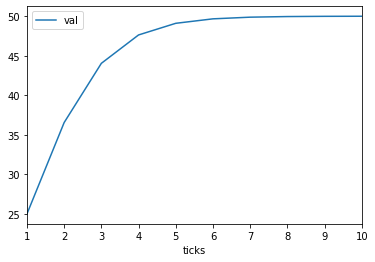

In [10]:
df2.set_index('ticks').plot()

   ticks        val
0      1  25.000000
1      2  36.552929
2      3  44.039854
3      4  47.628706
4      5  49.100690
5      6  49.665357
6      7  49.876369
7      8  49.954447
8      9  49.983232
9     10  49.993830


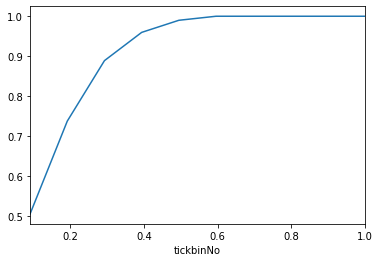

In [11]:
print(df2)
calcSampledCurve(df2, "val", 100, 100)

In [77]:
data = [[.1, .5],[.1, .6],[.4,.7] ]
tempdf1 = pd.DataFrame(data, columns=['x','val'])
tempdf1.set_index('x',inplace=True)
print(tempdf1)

data = [[.2, .5],[.5, .8],[.7,.9] ]
tempdf2 = pd.DataFrame(data, columns=['x','val'])
tempdf2.set_index('x',inplace=True)
print(tempdf2)

namelist = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
print(names)

tempdf1 = tempdf1.groupby('x').max()
tempdf2 = tempdf2.groupby('x').max()

minname = min(tempdf1.iloc[0].name, tempdf2.iloc[0].name)
print(minname)
val1 = 0.5
val2 = 0.5
mape_vals = []
for n in namelist:
    if(n >= minname):
        val1 = tempdf1.loc[n].val if (n in tempdf1.index) else (val1)
        val2 = tempdf2.loc[n].val if (n in tempdf2.index) else (val2)
        mape_val = abs((val1 - val2)/ val2)
        mape_vals.append(mape_val)
        print(f"name:{n} : df1:{val1} -> df2:{val2} == {mape_val}")
print(mape_vals)
print(np.mean(mape_vals))

     val
x       
0.1  0.5
0.1  0.6
0.4  0.7
     val
x       
0.2  0.5
0.5  0.8
0.7  0.9
[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
0.1
name:0.1 : df1:0.6 -> df2:0.5 == 0.19999999999999996
name:0.2 : df1:0.6 -> df2:0.5 == 0.19999999999999996
name:0.3 : df1:0.6 -> df2:0.5 == 0.19999999999999996
name:0.4 : df1:0.7 -> df2:0.5 == 0.3999999999999999
name:0.5 : df1:0.7 -> df2:0.8 == 0.1250000000000001
name:0.6 : df1:0.7 -> df2:0.8 == 0.1250000000000001
name:0.7 : df1:0.7 -> df2:0.9 == 0.2222222222222223
name:0.8 : df1:0.7 -> df2:0.9 == 0.2222222222222223
name:0.9 : df1:0.7 -> df2:0.9 == 0.2222222222222223
name:1 : df1:0.7 -> df2:0.9 == 0.2222222222222223
[0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.3999999999999999, 0.1250000000000001, 0.1250000000000001, 0.2222222222222223, 0.2222222222222223, 0.2222222222222223, 0.2222222222222223]
0.21388888888888893


0.6

Beta : 0.85
Initial time : 0.05
Initial Infects : 0.05
GT:
    timebinMid  valbinMid
0        0.05       0.05
1        0.15       0.15
2        0.25       0.15
3        0.35       0.35
4        0.45       0.65
5        0.55       0.75
6        0.65       0.75
7        0.75       0.85
8        0.85       0.95
9        0.95       0.95


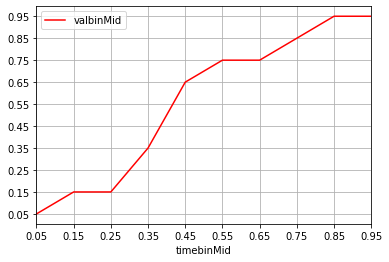

valbinMid
timebinMid           
0.05             0.05
0.15             0.15
0.25             0.15
0.35             0.35
0.45             0.65
0.55             0.75
0.65             0.75
0.75             0.85
0.85             0.95
0.95             0.95

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

groundTruth_df = pd.read_csv("/home/social-sim/RESEARCH/DOI_Inverse/doiemd/outputs/anti_58_of_163__binned_10x10.csv")
groundTruth_df = groundTruth_df[['timebinMid','valbinMid']]
#groundTruth_df = groundTruth_df[groundTruth_df['timebinMid'] != 0]
groundTruth_df = groundTruth_df.groupby('timebinMid').median()['valbinMid'].reset_index()

init_beta = 0.85
init_time = groundTruth_df.iloc[0]['timebinMid']
init_infects = groundTruth_df.iloc[0]['valbinMid']

print(f"Beta : {init_beta}")
print(f"Initial time : {init_time}")
print(f"Initial Infects : {init_infects}")

print("GT:\n",groundTruth_df)
groundTruth_df.set_index('timebinMid').plot(label='median', color='red')
plt.xticks(np.arange(0.05, 1.0, 0.1))
plt.yticks(np.arange(0.05, 1.0, 0.1))
plt.grid(True)
plt.legend()
plt.show()

groundTruth_df.set_index("timebinMid", inplace=True)
groundTruth_df

In [47]:
np.linspace(0, 1, 1 + 10)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [61]:
x = pd.cut([],bins=np.linspace(0, 1, 1 + 10))
print(x)
print(type(x))
list(pd.cut([],bins=np.linspace(0, 1, 1 + 10)).categories.mid)

[], Categories (10, interval[float64]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]
<class 'pandas.core.arrays.categorical.Categorical'>


[0.05,
 0.15000000000000002,
 0.25,
 0.35,
 0.45,
 0.55,
 0.6499999999999999,
 0.75,
 0.8500000000000001,
 0.95]